# Learning Decision-Making patterns in the OFC
### An analysis of a gambling task on epileptic patients
#### Nader Namini Asl, CogSci C127 Fall 2018

## Introduction (i.e. Background and Significance)

**Research question:** "Can we use a machine learning classification model to predict decisions based on neural activity in the orbito-frontal cortex? The answer to this question would allow us, by looking at the learned model, to better understand how patterns of neural activity can lead to a decision."

This notebook is going to explore the possibility of using a machine learning model, such as convolutional neural networks, to predict an individual's decisions based on neural activity in the orbito-frontal cortex (OFC). There have been numerous studies and experiments on the role of OFC in human decision making. In one study, it was found that the activity in the OFC is reduced if the individual is told what to do as opposed to when the individual is free to make his or her choice [7]. It was further found that the neurons in the frontal cortex, which includes the OFC, encoded both the predicted outcome during the choice phase of a decision-making task as well as the experienced outcome in the outcome phase of the same task [5]. Experiments on this topic also try to learn from the cross-species differences and similarities in the OFC [6]. Most of these studies point to the main role that the OFC plays in processing rewards by integrating multiple sources of information regarding reward outcome to derive a value signal [2][3]. Moreover, OFC has been implicated in an individual's understanding of the level of ambiguity and risk in a decision-making task [9]. These findings illustrate the importance of OFC in the decision-making process in humans. Our goal is to take a different approach to these studies and try to produce a computational model that is able to learn the activity patterns of OFC and be able to accurately produce outcomes (i.e., predictions) that match the one's produced by the individual with those activity patterns. This computational model coupled with an understanding of what it represents and encodes can significantly aid our understanding of the human decision-making process.

The importance of having a model of the decision-making process is exhaustively explored in a paper by Rangel, et al. [8]. One of the main uses of this understanding is in psychiatry, as explored in an fMRI study of young patients with major depressive disorder (MDD), who exhibited less neural response than control participants, i.e., young patients with no history of psychiatric disorders, in reward-related brain areas, including the OFC, during both the decision/anticipation and outcome phase of a reward decision-making task [4]. It can, also, aid in understanding the underlying causes of neuropsychiatric and behavioral disorders associated with diminished neural sensitivity to losses among individuals [10][11] as well as provide better support for individuals suffering from substance abuse, such as cocaine abuse, who show persistent functional abnormalities in the prefrontal neural networks involved in decision-making [1]. In this notebook, we will solely focus on the role of OFC as the dataset is limited to the recordings in this area, but it should be noted that the decision-making network in the human brain consists of the various functional areas, including but not limited to the OFC, anterior cingulate cortex (ACC), dorsolateral prefrontal cortex (DLPFC), and the dorsal anterior cingulate cortices (ACd). Moreover, recently, it has been shown that the emotional processes, mainly those associated wtih the amygdala, can influence the human decision [12]. Therefore, to develop a comprehensive model of the decision-making network in the brain, all these areas need to be considered and included in the model. Nevertheless, a computational model of the OFC and decisions can provide a foundational step towards this comprehensive model as the OFC plays a pivotal role in how humans make decisions.

Note, for a general case, the problem of finding a classification algorithm to predict a decision is unbounded as the number of possible outcomes are infinite, so we focused on a binary classification case, as described in the **Data analysis and Results** section.

## Methods and dataset description

For this project, I am using the [ofc-3 dataset](http://crcns.org/data-sets/ofc/ofc-3/about-ofc-2)<sup>1</sup>. This dataset contains electrocorticography (ECoG) recordings from the orbitofrontal cortex (OFC) of n=10 neurosurgical patients being operated on for the treatment of epilepsy. During the ECoG recordings, patients played a simple decision-making task (a gambling game) – the behavior and timestamps of the relevant events were recorded. Recordings last ~15min on average, each including 200 behavioral trials. The following description of the dataset has been inspired by the dataset description found [here](http://crcns.org/files/data/ofc-3/crcns_ofc-3_data_description.pdf):
#### Subjects
Data was collected from 10 (4 female) adult subjects with intractable epilepsy who were implanted with chronic subdural grid and/or strip electrodes as part of a preoperative procedure to localize the epileptogenic focus. We paid careful attention to the
patient’s neurological condition and only tested when the patient was fully alert and cooperative. The surgeons determined electrode placement and treatment based solely on the clinical needs of each patient. Due to IRB limitations, subjects were not paid for
their participation in the study but were encouraged to make as many points as possible. As part of the clinical observation procedure, patients were off anti-epileptic medication during these experiments. All subjects gave written informed consent to
participate in the study in accordance with the University of California, Berkeley Institutional Review Board.
#### Behavioral Task

We probed risk-reward tradeoffs using a simple gambling task in which subjects chose between a sure payoff and a gamble for potential higher winnings. Trials started with a fixation cross (t=0), followed by the game presentation screen (t=750ms). At that time, patients were given up to 2s to choose between a fixed prize (safe bet, 10 dollars) and a higher payoff (e.g. 30 dollars). Gamble prizes varied between 10 and 30 dollars, in 5-dollar increments. If the patient did not choose within the allotted time limit, a timeout occurred and no reward was awarded for that round. Timeouts were infrequent (9.98\% of all trials) and were excluded from analysis. Gamble win probability varied round by round; at the time of game presentation, subjects are shown a number between 0-10. At the time of outcome (t=550ms post-choice), a second number (also 0-
10) is revealed, and the subject wins the prize if the second number is greater than the first one. Only integers were presented, and ties were not allowed; therefore, a shown '2' had a win probability of 20\%. The delay between buttonpress and gamble outcome presentation (550ms) was fixed, and activity for both epochs is temporally aligned. Therefore, offer value, risk and chosen value vary parametrically on a round-by-round basis, and patients had full knowledge of the (fair) task structure from the beginning of the game. Both numbers were randomly generated using a uniform distribution. The gamble outcome (win/loss) was revealed regardless of subject choice, allowing us to
calculate experiential and counterfactual prediction errors (see Behavioral analysis, below). A new round started 1s after outcome reveal. Patients played a total of 200 rounds (plus practice rounds), and a full experimental run typically lasted 12-15min. Location of safe bet and gamble options (left/right) was randomized across trials. Patients completed a training session prior to the game in which they played at least 10 rounds under the experimenter's supervision until they felt confident they understood
the task, at which point they started the game. This gambling task minimized other cognitive demands (working memory, learning, etc.) on our participants, while at the same time allowing us to probe important decision-making components implicated in previous computational and empirical studies, 

#### ECoG Recording
ECoG has a sptial resolutions of ~1cm and a temporal resolution of smaller than 5ms [1]. The recorded data is in 2D but it directly measuresneural activity and has a relatively good signal quality. ECoG was recorded and stored with behavioral data. Data processing was: channels were amplified x10000, analog filtered (0.01-1000 Hz) with \>2kHz digitization rate, re-referenced to a common average off-line, high-pass filtered at
1.0 Hz with a symmetrical (phase true) finite impulse response (FIR) filter (~35 dB/octave roll-off). Channels with low signal-to-noise ratio (SNR) were identified and deleted (i.e. 60 Hz line interference, electromagnetic equipment noise, amplifier saturation, poor contact with cortical surface). Out of 210 OFC electrodes, 192 were artifact-free and included in subsequent analyses and in the current dataset.
Additionally, all channels were visually inspected by a neurologist to exclude epochs of aberrant or noisy activity (typically <1% of datapoints). A photodiode recorded screen updates in the behavioral task, recorded in the electrophysiological system as an analog input and used to synchronize behavioral and electrophysiological data. Data analysis was carried out in MATLAB and R using custom scripts. Data for each channel was downsampled to 1KHz and filtered into high frequency activity (HFA; 70–200 Hz) using a two-way, zero phase-lag, finite impulse response band pass filter to prevent phase distortion.






<sub>1 Originally, this project was going to utilize the [ofc-1](http://crcns.org/data-sets/ofc/ofc-1/about-ofc-1) and [ofc-2](http://crcns.org/data-sets/ofc/ofc-2/about-ofc-2) datasets which contain the recordings from orbitofrontal cortex of five and three rats during an odor discrimination task, respectively. However, since the project limited its scope to human participants, we have decided to exclude those datasets from the current project, even though they could be used in a similar cross-species data analysis project.</sub>

## Data analysis and Results

Initially, the PCA and ICA were intended to be used for reducing the dimensionality of the ECoG signal data from this dataset. However, upon closer inspection for data for each subject, since recordings only take place for a few hundred miliseconds across a handful (on average ~10) of electrodes, it was decided that dimensionality reduction would not be needed. Therefore, in the following sections, we will, first, start with analyzing the ECoG recording data and then using each of the following methods to try to find a classification model (according to the research question) that is able to predict each subject's decision. It should be noted that a separate model (for each of the algorithms below) was trained and test for each subject due to the significant individual differences between the individiuals in this datasets: subjects suffer from intractable epilepsy and each have a varying number of electrodes implanted during their operation.
- _Fully-connected Neural Network_
- _Convolutional Neural Network_
- _Decision Trees_
    - _Decision Tree Classifier_
    - _Decision Tree Ensembles_
        - _Random Forest_
        - _AdaBoost_

### Data preprocessing

#### Imports

In [137]:
from utils import get_data, delete_files_in_folder
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import tensorflow.contrib.eager as tfe
import tensorflow.contrib.slim as slim
tf.enable_eager_execution()
from sklearn.model_selection import KFold, train_test_split
import numpy as np
import math
import warnings
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
warnings.filterwarnings(action='once')

#### Data Processing

In [2]:
dataset = get_data('ofc-3')

In [3]:
# Behavioral data
data_behav = dataset['data_behav']
# Electrophysiological data
data_ephys = dataset['data_ephys']

In [4]:
# Gamble Choices Description File
gamble_choices = data_behav['gamble_choices.csv']
# Behavioral data for each subject
subjects_behav = {filename.split('.')[-2]: data_behav[filename] for filename in
                  data_behav if filename != 'gamble_choices.csv'}
# Electrophysiological data for each subject
subjects_ephys = {filename.split('_')[0]: data_ephys[filename] for filename in data_ephys}

In [202]:
subject = 1
rnd = 1
num_electrodes = subjects_ephys['s' + (2 - len(str(subject))) * '0' +
                                str(subject)]['game_events_hg'][rnd - 1].shape[1]
print(f'High-gamma activity at [-1,2]s around round {rnd}\'s game presentation across' +
      f' all\n ({num_electrodes}) electrodes for subject {subject}*')
print('*5 randomly selected timepoints')
subj_data = subjects_ephys['s' + (2 - len(str(subject))) * '0'
                           + str(subject)]['game_events_hg'][rnd - 1]
print(subj_data[np.random.randint(subj_data.shape[0], size=5), :])

High-gamma activity at [-1,2]s around round 1's game presentation across all
 (5) electrodes for subject 1*
*5 randomly selected timepoints
[[ -2.0785973    0.34736392   1.5111742   -4.1830373    0.53603595]
 [ -7.5128226   -6.5169864   -2.76558     -9.884631   -13.299125  ]
 [  0.8538559   -1.0405083    2.5625312   -4.038996    -8.635248  ]
 [ -5.80241     -9.3377285    1.8850899   -6.8087087   -9.930227  ]
 [ -2.3730583   -5.2646356    3.055933    -7.5489974  -11.69008   ]]


As we can see above, the ECoG recordings include both negative and positive values. This is due to the fact that ECoG signals measure the local field potential that is directional. However, interpreting this data is beyond the scope of this analysis. We experimented with the data recorded at timepoints as well as data after window averaging (200ms windows at 50ms increments). You can see a random selection of 5 datapoints from this dataset below.

In [203]:
print(f'High-gamma activity at [-1,2]s around round {rnd}\'s game presentation across' +
      f' all\n ({num_electrodes}) electrodes for subject {subject} after window ' +
      'averaging (200ms windows at 50ms increments)*')
print('*5 randomly selected timepoints')
subj_data = subjects_ephys['s' + (2 - len(str(subject))) * '0'
                           + str(subject)]['game_window_events_hg'][rnd - 1]
print(subj_data[np.random.randint(subj_data.shape[0], size=5), :])

High-gamma activity at [-1,2]s around round 1's game presentation across all
 (5) electrodes for subject 1 after window averaging (200ms windows at 50ms increments)*
*5 randomly selected timepoints
[[-0.67004764 -5.1838365   2.1279511  -3.3658037  -5.8301063 ]
 [-1.9281056  -2.7645626   1.1607416  -0.6538044  -2.0273159 ]
 [-3.3066487  -2.0957196   0.70742995 -0.09220996 -2.9887273 ]
 [-2.8015594  -1.9506214   2.7574852  -3.1639369  -9.63402   ]
 [-2.2994387  -6.0066776   2.1393576  -1.1960033  -7.1816363 ]]


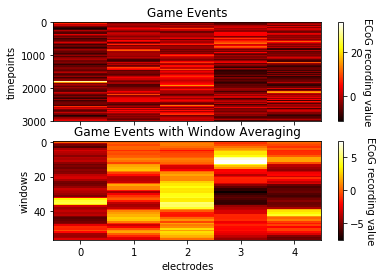

In [7]:
fig, ax = plt.subplots(2, sharex=True)

X_data = data_ephys['s01_ofc_hg_events.mat']['game_events_hg']
im1 = ax[0].imshow(X_data[1][:, :], interpolation="none", aspect='auto', cmap='hot')
color1 = fig.colorbar(im1, ax=ax[0])
color1.ax.set_ylabel('ECoG recording value', rotation=270, labelpad=10)

X_data = data_ephys['s01_ofc_hg_events.mat']['game_window_events_hg']
im2 = ax[1].imshow(X_data[1][:, :], interpolation="none", aspect='auto', cmap='hot')
color2 = fig.colorbar(im2, ax=ax[1])
color2.ax.set_ylabel('ECoG recording value', rotation=270, labelpad=10)
# display images
ax[0].set_title('Game Events')
ax[1].set_title('Game Events with Window Averaging')

ax[0].set(ylabel='timepoints')
ax[1].set(ylabel='windows')
ax[1].set(xlabel='electrodes')
plt.show()

As we can see above and as expected, the game events with window average result in smoother recordings and from experimenting with this dataset, we have found very comparable results in the performance of the trained machine learning models. So, from this point forward, we are going to use the window averaged dataset for recordings around the game presentation as well the button press event, the latter illustrated below.
_It should be noted that although the results analyzed only the dataset for subject 1, the conclusions can be extended to the rest of the subjects._

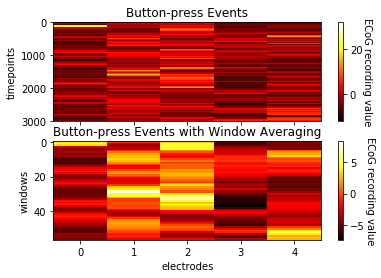

In [8]:
fig, ax = plt.subplots(2, sharex=True)

X_data = data_ephys['s01_ofc_hg_events.mat']['buttonpress_events_hg']
im1 = ax[0].imshow(X_data[1][:, :], interpolation="none", aspect='auto', cmap='hot')
color1 = fig.colorbar(im1, ax=ax[0])
color1.ax.set_ylabel('ECoG recording value', rotation=270, labelpad=10)

X_data = data_ephys['s01_ofc_hg_events.mat']['buttonpress_window_events_hg']
im2 = ax[1].imshow(X_data[1][:, :], interpolation="none", aspect='auto', cmap='hot')
color2 = fig.colorbar(im2, ax=ax[1])
color2.ax.set_ylabel('ECoG recording value', rotation=270, labelpad=10)
# display images
ax[0].set_title('Button-press Events')
ax[1].set_title('Button-press Events with Window Averaging')

ax[0].set(ylabel='timepoints')
ax[1].set(ylabel='windows')
ax[1].set(xlabel='electrodes')
plt.show()

Please _note_ that in the following implementations of various machine learning models, we have used $k$-fold cross-validation to ensure the validity of the accuracy measures displayed.

### Method 1: Fully-connected

To start, we are going to train a fully-connected neural network with a single hidden-layer of size 200. The motivation behind using this algorithm is the ability of nonlinear neural networks to extract complex patterns in the data. However, interpreting the results from this model is very difficult in terms of what it means for the neural activity in the OFC. We use the result from this method as a benchmark for the other methods analyzed in the rest of this notebook.

In [9]:
def make_dataset(X_data, y_data, n_splits):
    def gen():
        for train_index, test_index in KFold(n_splits, shuffle=True).split(X_data):
            X_train, X_test = X_data[train_index], X_data[test_index]
            y_train, y_test = y_data[train_index], y_data[test_index]
            yield X_train, y_train, X_test, y_test
    return tf.data.Dataset.from_generator(gen,
                                          (tf.float64, tf.int64,
                                           tf.float64, tf.int64))

In [10]:
def nn_run(dataset_type='game_window_events_hg'):
    subject_results = {}
    for sbj in subjects_behav:
        subject_results[sbj] = {}
        runs = [None, 'Left', 'Right']
        non_tout = subjects_behav[sbj]['choice.class'] != "Timeout"
        subject = subjects_behav[sbj][non_tout]
        subject['round'] = subject['round'] - 1
        subject_X_data = subjects_ephys[sbj][dataset_type]
        max_exp = subject_X_data.shape[0]
        for run in runs:
            subject_data = None
            if run:
                subject_data = subject[gamble_choices.iloc[non_tout.values]['Risky.Side']
                                       == run]
                subject_data = subject_data.loc[subject_data['round']
                                                < max_exp]['round'].values
            else:
                subject_data = subject[subject['round'] < max_exp]['round']
            y_data = subject['choice.class'].map({'Gamble': 1,
                                                  'Safebet': 0}).values[subject_data]
            X_data = subject_X_data[subject_data]
            min_len = min(len(y_data), len(X_data))
            y_data, X_data = y_data[:min_len], X_data[:min_len]
            print(sbj, run, min_len)
            datum = make_dataset(X_data, y_data, n_splits=max(min(5, min_len // 2), 2))
            folds = []

            for X_train, y_train, X_test, y_test in tfe.Iterator(datum):
                model = keras.Sequential([
                keras.layers.Flatten(input_shape=X_data.shape[1:]),
                keras.layers.Dense(200, activation=tf.sigmoid),
                keras.layers.Dense(2, activation=tf.nn.softmax)
                ])
                model.compile(optimizer=tf.train.AdamOptimizer(), 
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
                model.fit(X_train, y_train, epochs=10)
                test_loss, test_acc = model.evaluate(X_test, y_test)
                results = {'model': model, 'test_loss': test_loss, 'test_acc': test_acc}
                folds.append(results)
            subject_results[sbj][run] = sum(x['test_acc'] for x in folds) / len(folds)
    return subject_results

In [ ]:
results = nn_run()

In [194]:
def draw_bars(subject_results, model_type='fully-connected', model_cat='Neural Network',
              dataset='game_window_events_hg'):
    nones = [subject_results[x][None] * 100 for x in subject_results]
    lefts = [subject_results[x]['Left'] * 100 for x in subject_results]
    rights = [subject_results[x]['Right'] * 100 for x in subject_results]
    # create plot
    fig, ax = plt.subplots()
    index = np.arange(len(subject_results))
    bar_width = 0.2
    opacity = 0.8

    rects1 = plt.bar(index, lefts, bar_width,
                     alpha=opacity,
                     color='r',
                     label='Full')

    rects2 = plt.bar(index + bar_width, nones, bar_width,
                     alpha=opacity,
                     color='g',
                     label='Left')

    rects2 = plt.bar(index + 2 * bar_width, rights, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Right')

    plt.axhline(y=50, color='black', linestyle='--', linewidth=0.9)
    plt.xlabel('Subjects')
    plt.ylabel('Accuracy (% Percent)')
    plt.title('Accuracy of a ' + model_type + ' ' + model_cat + ' in predicting\n the gamble/' + 
              'safebet decision using ' + dataset)
    plt.xticks(index + bar_width, ['0' * (2 - len(str(i))) + str(i) for i in range(1, 11)])
    plt.yticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
    plt.legend()

    plt.tight_layout()
    plt.show()

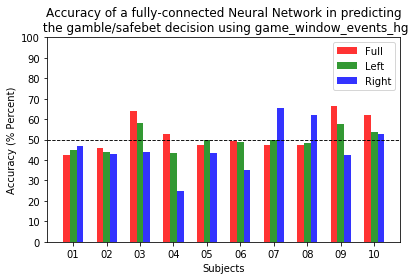

In [13]:
draw_bars(results)

In [ ]:
results = nn_run('buttonpress_window_events_hg')

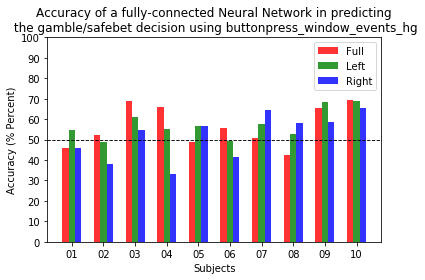

In [15]:
draw_bars(results, dataset='buttonpress_window_events_hg')

###### _Left, Full, and Right refer to whether only the rounds where the risky bet appeared on the left, right, or either side were chosen in training and testing_.

####  Performance
As we can observe, the fully connected network performs better than chance for only a few individuals. Now, since the training that occurs is random, there could be runs of the above training that result in better overall performance. However, from multiple runs of the training and testing process, it became clear that a fully-connected neural network is not a good model for classifying this dataset. Also, you can notice that using the buttonpress data significantly improves the performance of the network for some of the subjects as the data relates more closely to the choice made by the subject. As mentioned before, since it's hard to interpret the results from a fully-connected network, we are going to use a different type of neural networks, convolutional neural networks, that allows us to uncover patterns in the data

### Method 2: Convolutional Neural Network

Here, we are training a convolutional neural network on both the game events and buttonpress data. The architecture of the network consisted of a convolutional layer that computes 32 features using a 5x5 filter with ReLU activation, a max-pooling layer with a 2x2 filter and stride of 2, a densely connected layer with 1024 neurons, and an output/logits layer. The specific architecture was used to allow us to uncover patterns in the activation map of the ECoG recording while keeping a relatively high accuracy. Achieving so would give us a good representation of decision-making in specific areas of the OFC that would aid our understanding the decision network in the brain.

In [16]:
def make_dataset(X_data, y_data, n_splits):
    def gen():
        for train_index, test_index in KFold(n_splits, shuffle=True).split(X_data):
            X_train, X_test = X_data[train_index], X_data[test_index]
            y_train, y_test = y_data[train_index], y_data[test_index]
            yield X_train, y_train, X_test, y_test
    return gen()

Please _note_ that the following two methods for convolutional neural networks have been adapted from [the tutorial](https://www.tensorflow.org/tutorials/estimators/cnn#building_the_cnn_mnist_classifier) by authors of Tensorflow.

In [41]:
def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    x, y = features["x"].shape[1:]

    # Input Layer
    # Reshape X to 4-D tensor: [batch_size, width, height, channels]
    # ECoG recordings have various sizes but only have one color channel
    input_layer = tf.reshape(features["x"], [-1, x, y, 1])

    # Convolutional Layer #1
    # Computes 32 features using a 5x5 filter with ReLU activation.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, N, M, 1]
    # Output Tensor Shape: [batch_size, N, M, 32]
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)


    # Pooling Layer #1
    # First max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, N, M, 32]
    # Output Tensor Shape: [batch_size, N/2, M/2, 32]
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    # Flatten tensor into a batch of vectors
    # Input Tensor Shape: [batch_size, N/2, M/2, 32]
    # Output Tensor Shape: [batch_size, N/2 * M/2 * 32]
    pool1_flat = tf.reshape(pool1, [-1, x * y * 8])

    # Dense Layer
    # Densely connected layer with 1024 neurons
    # Input Tensor Shape: [batch_size, N/2 * M/2 * 32]
    # Output Tensor Shape: [batch_size, 1024]
    dense = tf.layers.dense(inputs=pool1_flat, units=1024, activation=tf.nn.relu)

    # Add dropout operation; 0.6 probability that element will be kept
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits layer
    # Input Tensor Shape: [batch_size, 1024]
    # Output Tensor Shape: [batch_size, 2]
    logits = tf.layers.dense(inputs=dropout, units=2)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [42]:
def cnn_run(dataset_type='game_window_events_hg'):
    subject_results = {}
    for sbj in subjects_behav:
        subject_results[sbj] = {}
        runs = [None, 'Left', 'Right']
        # Load training and eval data
        non_tout = subjects_behav[sbj]['choice.class'] != "Timeout"
        subject = subjects_behav[sbj][non_tout]
        subject['round'] = subject['round'] - 1
        subject_X_data = subjects_ephys[sbj][dataset_type]
        x_shape = subject_X_data.shape
        # Make sure that the data has an even size in both dimensions
        subject_X_data = subject_X_data[:, :x_shape[1] - x_shape[1] % 2, :x_shape[2] - x_shape[2] % 2]
        max_exp = subject_X_data.shape[0]
        for run in runs:
            subject_data = None
            if run:
                subject_data = subject[gamble_choices.iloc[non_tout.values]['Risky.Side'] == run]
                subject_data = subject_data.loc[subject_data['round'] < max_exp]['round'].values
            else:
                subject_data = subject[subject['round'] < max_exp]['round']
            y_data = subject['choice.class'].map({'Gamble': 1, 'Safebet': 0}).values[subject_data]
            X_data = subject_X_data[subject_data]
            min_len = min(len(y_data), len(X_data))
            y_data, X_data = y_data[:min_len], X_data[:min_len]
            num_splits = max(min(5, min_len // 2), 2)
            datum = make_dataset(X_data, y_data, n_splits=num_splits)
            folds = []
            for train_data, train_labels, eval_data, eval_labels in datum:
                delete_files_in_folder("/tmp/ecog_convnet_model")
                # Create the Estimator
                ecog_classifier = tf.estimator.Estimator(
                    model_fn=cnn_model_fn, model_dir="/tmp/ecog_convnet_model")

                # Set up logging for predictions
                # Log the values in the "Softmax" tensor with label "probabilities"
                tensors_to_log = {"probabilities": "softmax_tensor"}
                logging_hook = tf.train.LoggingTensorHook(
                    tensors=tensors_to_log, every_n_iter=50)

                # Train the model
                train_input_fn = tf.estimator.inputs.numpy_input_fn(
                    x={"x": train_data},
                    y=train_labels,
                    batch_size=np.gcd(20, len(train_data)),
                    num_epochs=None,
                    shuffle=True)
                ecog_classifier.train(
                    input_fn=train_input_fn,
                    steps=100,
                    hooks=[logging_hook])

                # Evaluate the model and print results
                eval_input_fn = tf.estimator.inputs.numpy_input_fn(
                    x={"x": eval_data}, y=eval_labels, num_epochs=1, shuffle=False)
                eval_results = ecog_classifier.evaluate(input_fn=eval_input_fn)
                folds.append(eval_results)
            subject_results[sbj][run] = sum(x['accuracy'] for x in folds) / num_splits
    return subject_results

In [ ]:
cnn_game = cnn_run()

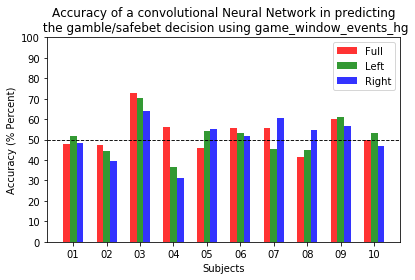

In [37]:
draw_bars(cnn_game, net_type='convolutional', dataset='game_window_events_hg')

In [ ]:
cnn_game = cnn_run('buttonpress_window_events_hg')

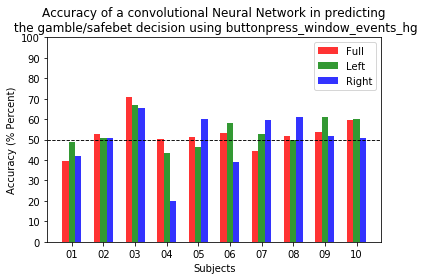

In [44]:
draw_bars(cnn_game, net_type='convolutional',
          dataset='buttonpress_window_events_hg')

####  Performance
As seen above, we don't see a noticeable improvement over a fully-connected neural network. However, this could due to the lack of hyperparameter tuning. The hyperparameters could be adjusted using random search [1], among other methods. However, due to the lack of computing resources and the significantly slow runtime of convolutional neural networks on CPUs, we have decided to evaluate the model using the chosen hyperparameters. In the following sections, we are going to visualize how the convolutional layer learned the activation map that was passed as an input to the network.

#### Sample run on Subject 3

##### Data

In [95]:
# Load training and eval data
sbj = 's03'
non_tout = subjects_behav[sbj]['choice.class'] != "Timeout"
subject = subjects_behav[sbj][non_tout]
subject['round'] = subject['round'] - 1
subject_X_data = subjects_ephys[sbj]['buttonpress_window_events_hg']
x_shape = subject_X_data.shape
# Make sure that the data has a size divisible by 4 in both dimensions
subject_X_data = subject_X_data[:, :x_shape[1] - x_shape[1] % 4, :x_shape[2] - x_shape[2] % 4]
max_exp = subject_X_data.shape[0]
subject_data = subject[subject['round'] < max_exp]['round']
y_data = subject['choice.class'].map({'Gamble': 1, 'Safebet': 0}).values[subject_data]
X_data = subject_X_data[subject_data]
min_len = min(len(y_data), len(X_data))
y_data, X_data = y_data[:min_len], X_data[:min_len]

##### Model

###### Initialization
Here, we experimented with using additional convolutional and max-pooling layer. The architecture of the following network consists of a convolutional layer that computes 8 features using a 5x5 filter with ReLU activation, a max-pooling layer with a 2x2 filter and stride of 2, another convolutional layer that computes 16 features using a 5x5 filter with ReLU activation, another max-pooling layer with a 2x2 filter and stride of 2, and a densely connected layer with 64 neurons, and an output/logits layer.

In [167]:
def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    x, y = features["x"].shape[1:]

    # Input Layer
    # Reshape X to 4-D tensor: [batch_size, width, height, channels]
    # ECoG recordings have various sizes but only have one color channel
    input_layer = tf.reshape(features["x"], [-1, x, y, 1])

    # Convolutional Layer #1
    # Computes 32 features using a 5x5 filter with ReLU activation.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, N, M, 1]
    # Output Tensor Shape: [batch_size, N, M, 16]
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=8,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    # Pooling Layer #1
    # First max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, N, M, 8]
    # Output Tensor Shape: [batch_size, N/2, M/2, 8]
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    # Flatten tensor into a batch of vectors
    # Input Tensor Shape: [batch_size, N/2, M/2, 8]
    # Output Tensor Shape: [batch_size, N/2 * M/2 * 8]
#     pool1_flat = tf.reshape(pool1, [-1, x * y * 2])

    # Convolutional Layer #2
    # Computes 64 features using a 5x5 filter.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, N/2, M/2, 8]
    # Output Tensor Shape: [batch_size, N/2, M/2, 16]
    conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=16,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

    # Pooling Layer #2
    # Second max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, N/2, M/2, 16]
    # Output Tensor Shape: [batch_size, N/4, M/4, 16]
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    # Flatten tensor into a batch of vectors
    # Input Tensor Shape: [batch_size, N/4, M/4, 16]
    # Output Tensor Shape: [batch_size, N/4 * M/4 * 16]
    pool2_flat = tf.reshape(pool2, [-1, x * y])

    # Dense Layer
    # Densely connected layer with 1024 neurons
    # Input Tensor Shape: [batch_size, N/4 * M/4 * 32]
    # Output Tensor Shape: [batch_size, 64]
    dense = tf.layers.dense(inputs=pool2_flat, units=64, activation=tf.nn.relu)

    # Add dropout operation; 0.6 probability that element will be kept
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.2, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits layer
    # Input Tensor Shape: [batch_size, 64]
    # Output Tensor Shape: [batch_size, 2]
    logits = tf.layers.dense(inputs=dropout, units=2)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "first_conv" : conv1,
        "second_conv" : conv2,
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode,
        loss=loss,
        predictions= {
            "first_conv" : conv1,
            "second_conv" : conv2,
        },
        eval_metric_ops=eval_metric_ops)

###### Training

In [170]:
num_splits = max(min(5, min_len // 2), 2)
datum = make_dataset(X_data, y_data, n_splits=num_splits)
folds = []
for train_data, train_labels, eval_data, eval_labels in list(datum)[:1]:
    delete_files_in_folder("/tmp/ecog_convnet_model")
    # Create the Estimator
    ecog_classifier = tf.estimator.Estimator(
        model_fn=cnn_model_fn, model_dir="/tmp/ecog_convnet_model")

    # Set up logging for predictions
    # Log the values in the "Softmax" tensor with label "probabilities"
    tensors_to_log = {"probabilities": "softmax_tensor"}
    logging_hook = tf.train.LoggingTensorHook(
        tensors=tensors_to_log, every_n_iter=50)

    # Train the model
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": train_data},
        y=train_labels,
        batch_size=np.gcd(20, len(train_data)),
        num_epochs=None,
        shuffle=True)
    ecog_classifier.train(
        input_fn=train_input_fn,
        steps=500,
        hooks=[logging_hook])

    # Evaluate the model and print results
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": eval_data}, y=eval_labels, num_epochs=1, shuffle=False)
    eval_results = ecog_classifier.evaluate(input_fn=eval_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/ecog_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12991df60>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Grap

###### Prediction of the a round for subject 3

In [171]:
i = 100
# Visualize the first layer of convolutions on an input image
X = X_data[i:i+1]

# Evaluate the model and print results
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": X}, num_epochs=1, shuffle=False)
predict_results = ecog_classifier.predict(
    predict_input_fn,
    predict_keys=None,
    hooks=None,
    checkpoint_path=None,
    yield_single_examples=True
)
predictions = list(predict_results)[0]
first_layer_filters = predictions['first_conv']
second_layer_filters = predictions['second_conv']

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/ecog_convnet_model/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


##### Visualizations

In [172]:
def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around plt.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest',
                   aspect='auto', cmap=cmap)
    plt.colorbar(im, cax=cax)

In [182]:
def plotCNNFilter(units, title='First'):
    filters = units.shape[2]
    plt.figure(1, figsize=(20,20))
    n_columns = 4
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[:,:,i], interpolation="nearest", cmap="gray")
    plt.suptitle(title + ' Convolutional Layer Filters')

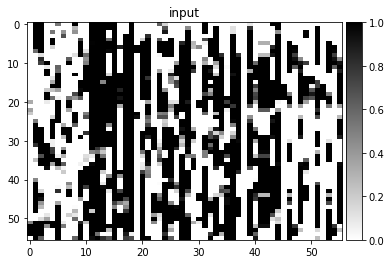

In [177]:
i = 100
# Visualize the first layer of convolutions on an input image
subject_X_data = subject_X_data[i:i+1]

plt.figure()
plt.title('input')
nice_imshow(plt.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.binary)

Above, you can see a binary representations of the original ECoG recording of subject 3 in one round of the game. The images that follow represent the filters learned by the first layer of the convolutional neural network, described a few cells above. The images proceeding these belong to the filters learned by the second layer of the convolutional neural network.

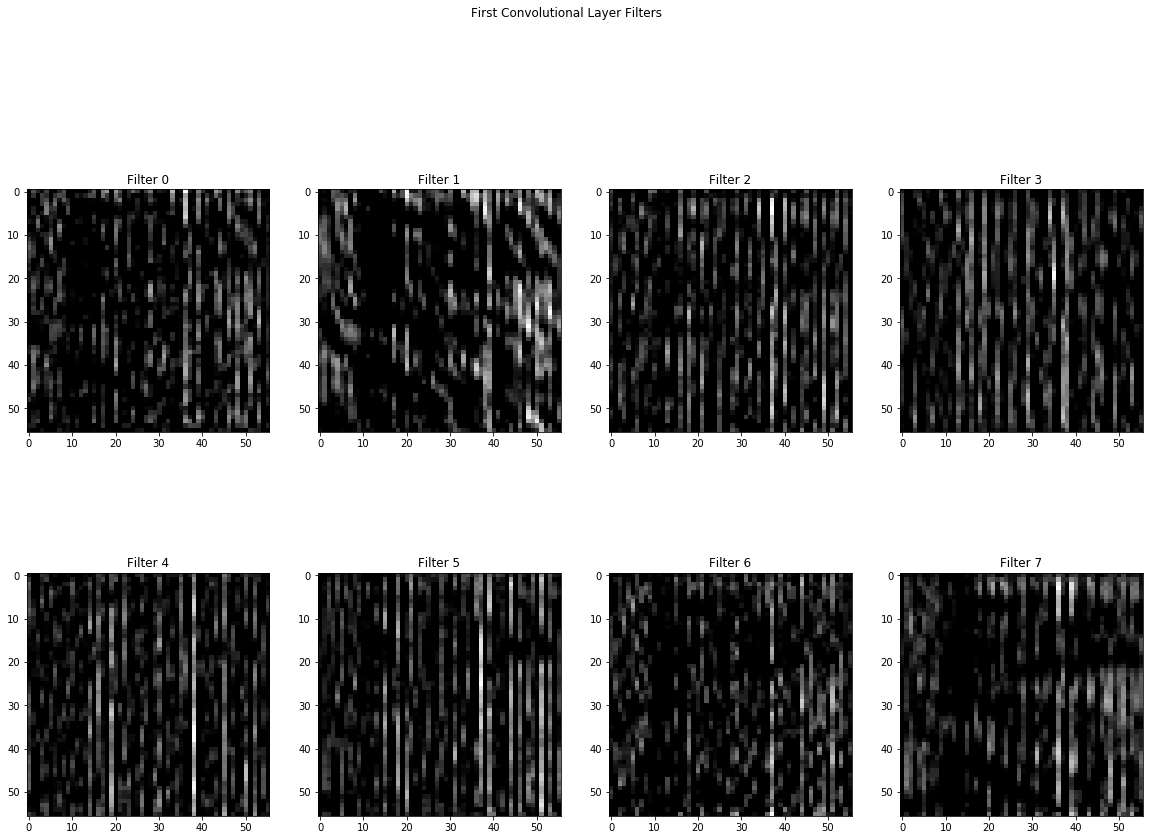

In [183]:
plotCNNFilter(first_layer_filters, title='First')

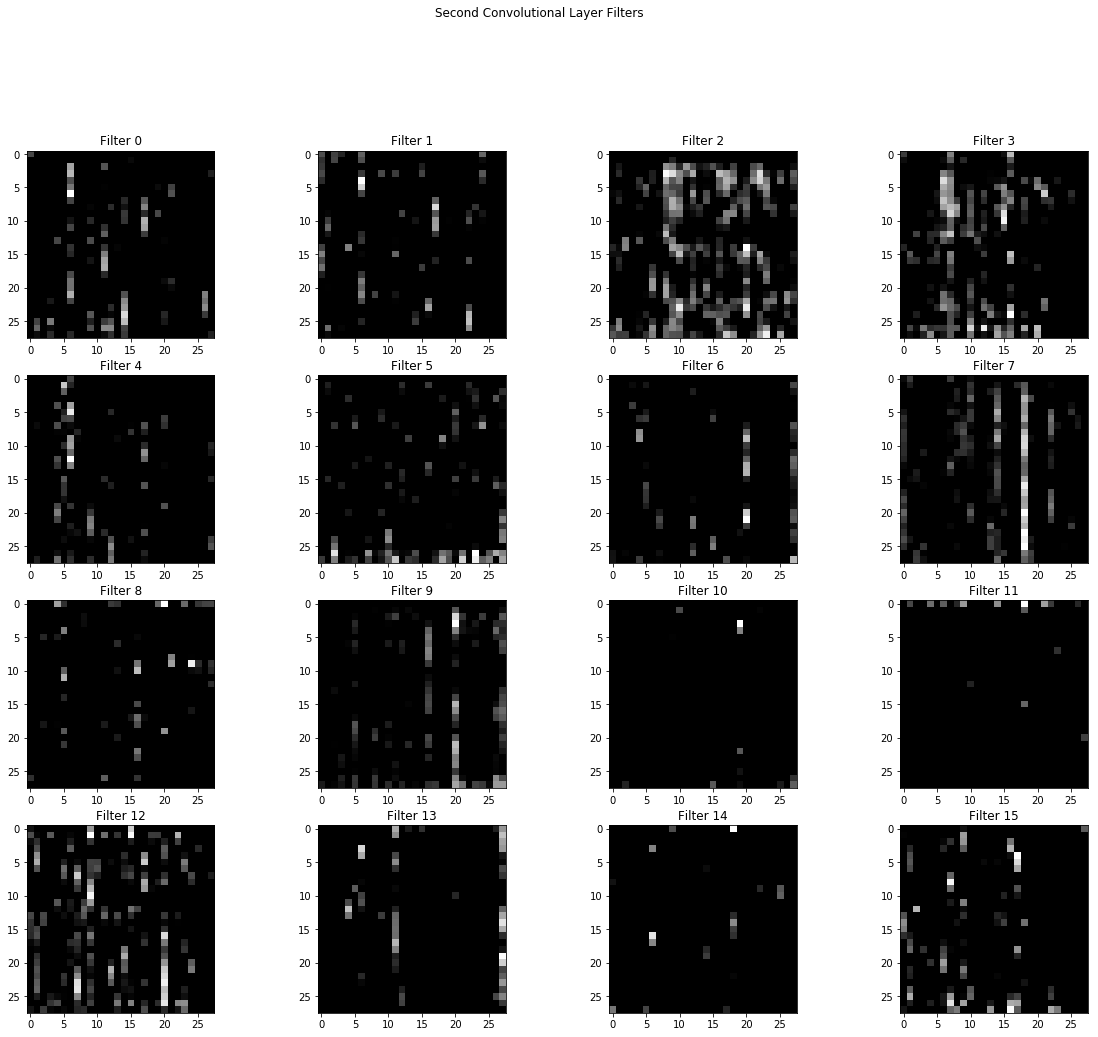

In [184]:
plotCNNFilter(second_layer_filters, title='Second')

As seen above, these filters are able to extract the higher-order to lower-order features of the input activation map as we move from the first convolutional layer to the second convolutional layer. This leads to a better performance with this specific structure as opposed to a single-layer convolutional neural network or a fully-connected neural network. The motivation behind choosing this network structure is its ability to extract features from the original input activation map that could possibly allow researchers and doctors interpret the results better. That is, by allowing them to understand what patterns of activity are important, they might learn an insight into how a specific decision was made.

In the last part of analysis, we analyze decision tree classification algorithms which are another machine learning methods to both classify and extract features.

### Method 3: Decision Trees

In the final analysis, we turn to decision trees. Decision trees learn splitting rules that split the dataset into chunks that are classified as one of the classes specified. In the case of this dataset, the splitting rules are based on the ECoG recording at each electrode at every timestep. Therefore, we will get rules that are able to identify both the time and the electrode that is significant enough to split the dataset into two separate sets for classifications. We limited the number of consecutive splitting rules to 64, but as seen at the end of this section, all the decision trees seem to converge at around a depth of 5.

Given enough data, decision trees are able to give us splitting rules that can very effectively classify the dataset and hence be a good model for how an individual, based on the activity in the OFC, makes a decision. The interpretation of this model, as with the convolutional neural network, needs to averaged across all the rounds that resulted in the same decision to reveal a common pattern among the neural activations that led to the same decision. This interpretatoin would assist in our understanding of the decision network in the brain by allowing us to discover the rules that lead to specific decisions.

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [212]:
models = {'Decision Tree': DecisionTreeClassifier,
          'Random Forest': RandomForestClassifier,
          'AdaBoostClassifier': AdaBoostClassifier}
kwargs = {'Decision Tree': {'criterion': 'gini',
                            'max_depth': 64,
                            'max_features': 'auto'},
          'Random Forest': {'n_estimators': 100,
                            'criterion': 'gini',
                            'max_depth': 64,
                            'max_features': 'auto'},
          'AdaBoostClassifier': {'base_estimator': DecisionTreeClassifier(max_depth=64),
                                 'n_estimators': 100}}
def dt_run(alg, dataset_type='game_window_events_hg'):
    subject_results, best_model = {}, (None, float("-inf"))
    for sbj in subjects_behav:
        subject_results[sbj] = {}
        runs = [None, 'Left', 'Right']
        non_tout = subjects_behav[sbj]['choice.class'] != "Timeout"
        subject = subjects_behav[sbj][non_tout]
        subject['round'] = subject['round'] - 1
        subject_X_data = subjects_ephys[sbj][dataset_type]
        max_exp = subject_X_data.shape[0]
        subject_X_data = subject_X_data.reshape(max_exp, -1)
        for run in runs:
            subject_data = None
            if run:
                subject_data = subject[gamble_choices
                                       .iloc[non_tout.values]['Risky.Side'] == run]
                subject_data = subject_data.loc[subject_data['round']
                                                < max_exp]['round'].values
            else:
                subject_data = subject[subject['round'] < max_exp]['round']
            y_data = subject['choice.class'].map({'Gamble': 1,
                                                  'Safebet': 0}).values[subject_data]
            X_data = subject_X_data[subject_data]
            min_len = min(len(y_data), len(X_data))
            y_data, X_data = y_data[:min_len], X_data[:min_len]
            datum = make_dataset(X_data, y_data, n_splits=max(min(5, min_len // 2), 2))
            folds = []

            for X_train, y_train, X_test, y_test in datum:
                model = models[alg](**kwargs[alg])
                model.fit(X_train, y_train)
                test_acc = model.score(X_test, y_test)
                if best_model[1] < test_acc:
                    best_model  = (model, test_acc)
                results = {'model': model, 'test_acc': test_acc}
                folds.append(results)
            subject_results[sbj][run] = sum(x['test_acc'] for x in folds) / len(folds)
    return subject_results, model

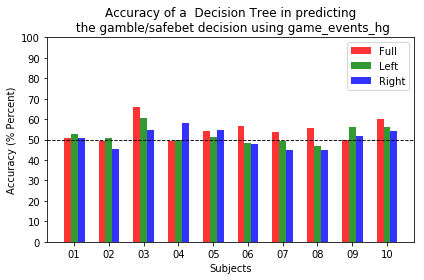

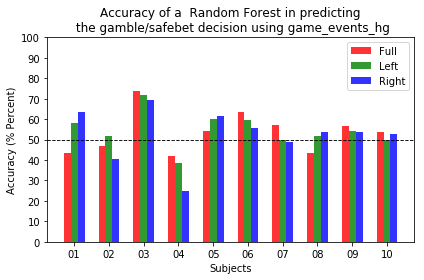

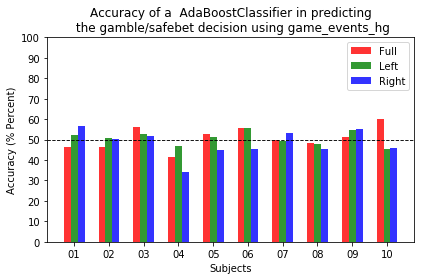

In [213]:
game_results = {key: dt_run(key, dataset_type='game_events_hg')
                for key in models}

for alg in game_results:
    draw_bars(game_results[alg][0], model_type='', model_cat=alg,
              dataset='game_events_hg')

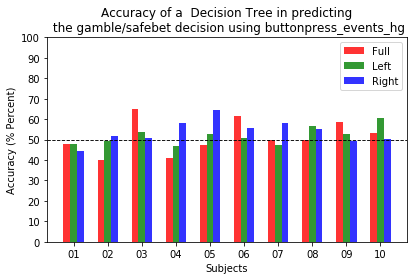

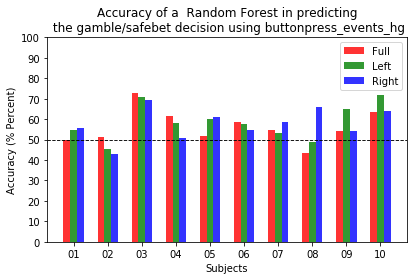

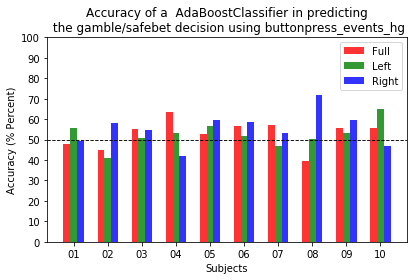

In [214]:
button_results = {key: dt_run(key, dataset_type='buttonpress_events_hg')
                  for key in models}

for alg in button_results:
    draw_bars(button_results[alg][0], model_type='', model_cat=alg,
              dataset='buttonpress_events_hg')

From these results, we can see that AdaBoost Classifier performed on average better than a single decision tree. However, performance of AdaBoost and Random Forest is comparable, so it would be good to look at one of the decision trees created in each of these decision tree ensembling algorithms.

In [224]:
from sklearn.tree import export_graphviz

In [226]:
# Export as dot file
dts = game_results['Random Forest'][1].estimators_
dt = dts[np.random.randint(len(dts), size=1)[0]]

export_graphviz(dt, out_file='tree.dot',
                class_names = np.array(['SafeBet', 'Gamble']),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
_ = call(['dot', '-Tpng', 'tree.dot', '-o', 'rand_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'rand_tree.png')

In [227]:
dts = game_results['AdaBoostClassifier'][1].estimators_
dt = dts[np.random.randint(len(dts), size=1)[0]]

export_graphviz(dt, out_file='tree.dot',
                class_names = np.array(['SafeBet', 'Gamble']),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
_ = call(['dot', '-Tpng', 'tree.dot', '-o', 'ada_tree.png', '-Gdpi=600'])

In [228]:
dt = game_results['Decision Tree'][1]

export_graphviz(dt, out_file='tree.dot',
                class_names = np.array(['SafeBet', 'Gamble']),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
_ = call(['dot', '-Tpng', 'tree.dot', '-o', 'dt_tree.png', '-Gdpi=600'])

In [236]:
# from IPython.display import HTML, display
# display(HTML("<table><tr>" +
#              "<td style=\"text-align:center\">Decision Tree Classifier</td>" +
#              "<td style=\"text-align:center\">" +
#              "Random Forest (random Decision Tree chosen)</td>" + 
#              "<td style=\"text-align:center\">" +
#              "AdaBoost (random Decision Tree chosen)</td>" + 
#              "</tr><tr><td><img src='dt_tree.png'></td><td>" + 
#              "<img src='rand_tree.png'></td><td>" +
#              "<img src='ada_tree.png'></td></tr></table>"))

Decision Tree | Random Forest | AdaBoost
- | --- | -
![alt](dt_tree.png) | ![alt](rand_tree.png) | ![alt](ada_tree.png)

Above, you can see a graphical representation of the best decision tree (across all subjects, based on intra-subject accuracy evaluations) learned by the decision tree classifer, a random decision tree from both the random forest and AdaBoost ensemble, respectively. To train these decision tree algorithms, the ECoG recording data for each round that was in 2 dimensions, i.e., `(num_recordings, num_electrodes)`, had to be flatten to a size of `num_recordings x num_electrodes`. Hence, the splitting rules, i.e. `X[21906]<=3.29`, refers to the index in the flattened recordings array for each round. If more recordings (i.e. more `num_electrodes`) were available, the splitting rules would be able to tell us potentially how significant specific ranges of activity are for a specific recording region. This would give researchers signifcant aid in understanding how specific areas of the brain are responsible for making a decision in the brain. However, in this dataset, only one of the subjects, subject 3, had close to a reasonable number of electrodes recording activity in the OFC, specifically 59 electrodes. It should noted that this subject resulted in highest accuracy in all the classifications above whereas the subject with the smallest number of electrodes resulted in the least accurate classifications.

# Conclusion/Discussion

In this notebook, we applied fully-connected and convolutional neural networks as well decision trees and decision tree ensembles such as random forest and AdaBoost to the problem of classifying an individual's action based on their ECoG recording. It should be noted that the number of electrodes recording OFC neural activity for each subject was shown to be directly correlated with the performance of each of the models. That is, the less electrodes were recording a patients neural activity during the task, the less the accuracy of the classification algorithms for that patient. This phenomenon is evident in the classification accuracy for subject 3, who had about 59 electrodes recording data, which was consistently significantly higher than that of other subjects in each of the classification schemes. By the end of this notebook, it is clear that we have fallen short of achieving our initial goal of finding a machine learning classification algorithm that is able to predict decisions most of the time (`>75%`), even in the case of a binary classification. It could be argued that the performance of each of these algorithms could be improved with some hyperparameter tuning. However, the current accuracy of these models is significantly low and it is unlikely that any amount of hyperparameter tuning can bring their accuracy to a level that could be considered statistically significant compared to random chance. Nonetheless, it should be noted that the various machine learning classification algorithms above were just a very small subset of the possible methods and algorithms that could be applied to this data. More importantly, these machine learning algorithm require a vast amount of data as input in order to be able to train accurately. The small number of electrodes recording neural activity for each patient could very possibly be a significant factor that affected the performance of our trained models. Moreover, here, we focused on only using the ECoG recordings as the basis for predicting the outcome of a patient's decision. One could extend this approach by incorporating more behavioral information from the dataset such as the time it took the subject to respond, etc. However, the goal of this analysis was to find a machine learning model that based solely on the activation map of the OFC would be able to predict the decision the patient was going to make.

From the methods tested here, convolutional neural networks and decision trees showed the greatest potential. These two classification algorithms provide two very different classification approaches yet similar in the general idea of feature extraction. If enough data is provided, convolutional neural networks have the potential to extract very rich set of features that could help uncover underlying patterns in the OFC that lead to a specific decision. Similarly, decision trees provided a set of splitting rules that would allow us to categorize a patient's brain activity and predict their decision. Working backwards from the decision, one could uncover the most likely pattern (i.e. the path through the decision tree) that leads to a specific decision for an indvidiual. Overall, with enough accurate brain neural activity recordings, these approaches have great potential in revealing previously-obscured patterns in neural activity in the brain's decision network that could help us understand this decision network better.

## References

- **Background**
    - [1] Bolla, K., Eldreth, D., London, E., Kiehl, K., Mouratidis, M., Contoreggi, C., . . . Ernst, M. (2003). Orbitofrontal cortex dysfunction in abstinent cocaine abusers performing a decision-making task. _NeuroImage, 19_(3), 1085-1094. doi:10.1016/s1053-8119(03)00113-7
    - [2] Wallis, J. D. (2007). Orbitofrontal Cortex and Its Contribution to Decision-Making. _Annual Review of Neuroscience, 30_(1), 31-56. doi:10.1146/annurev.neuro.30.051606.094334
    - [3] Kennerley, S. W., & Walton, M. E. (2011). Decision making and reward in frontal cortex: Complementary evidence from neurophysiological and neuropsychological studies. _Behavioral Neuroscience, 125_(3), 297-317. doi:10.1037/a0023575
    - [4] Forbes, E. E., May, J. C., Siegle, G. J., Ladouceur, C. D., Ryan, N. D., Carter, C. S., . . . Dahl, R. E. (2006). Reward-related decision-making in pediatric major depressive disorder: An fMRI study. _Journal of Child Psychology and Psychiatry, 47_(10), 1031-1040. doi:10.1111/j.1469-7610.2006.01673.x
    - [5] Kennerley, S. W., & Wallis, J. D. (2009). Evaluating choices by single neurons in the frontal lobe: Outcome value encoded across multiple decision variables. _European Journal of Neuroscience, 29_(10), 2061-2073. doi:10.1111/j.1460-9568.2009.06743.x
    - [6] Wallis, J. D. (2011). Cross-species studies of orbitofrontal cortex and value-based decision-making. _Nature Neuroscience, 15_(1), 13-19. doi:10.1038/nn.2956
    - [7] Walton, M. E., Devlin, J. T., & Rushworth, M. F. (2004). Interactions between decision making and performance monitoring within prefrontal cortex. _Nature Neuroscience, 7_(11), 1259-1265. doi:10.1038/nn1339
    - [8] Rangel, A., Camerer, C., & Montague, P. R. (2008). A framework for studying the neurobiology of value-based decision making. _Nature Reviews Neuroscience, 9_(7), 545-556. doi:10.1038/nrn2357
    - [9] Hsu, M. (2005). Neural Systems Responding to Degrees of Uncertainty in Human Decision-Making. _Science, 310_(5754), 1680-1683. doi:10.1126/science.1115327
    - [10] Tom, S. M., Fox, C. R., Trepel, C., & Poldrack, R. A. (2007). The Neural Basis of Loss Aversion in Decision-Making Under Risk. _Science, 315_(5811), 515-518. doi:10.1126/science.1134239
    - [11] Krain, A. L., Wilson, A. M., Arbuckle, R., Castellanos, F. X., & Milham, M. P. (2006). Distinct neural mechanisms of risk and ambiguity: A meta-analysis of decision-making. _NeuroImage, 32_(1), 477-484. doi:10.1016/j.neuroimage.2006.02.047
    - [12] Martino, B. D. (2006). Frames, Biases, and Rational Decision-Making in the Human Brain. _Science, 313_(5787), 684-687. doi:10.1126/science.1128356
- **Methods and dataset description**
    - [1] Asano, E., Juhasz, C., Shah, A., Muzik, O., Chugani, D. C., Shah, J., . . . Chugani, H. T. (2005). Origin and Propagation of Epileptic Spasms Delineated on Electrocorticography. _Epilepsia, 46_(7), 1086-1097. doi:10.1111/j.1528-1167.2005.05205.x
- **Data Analysis and Results**
    - [1] Bergstra, J., & Bengio, Y. (2012). Random Search for Hyper-Parameter Optimization. _Journal of Machine Learning Research, 13_, 281-305. Retrieved December 7, 2018.
- **Raw data**
    - __OFC-3__<br>Ignacio Saez, Jack Lin, Arjen Stolk, Edward Chang, Josef Parvizi, Gerwin Schalk, Robert T. Knight, and Ming Hsu (2018); High-frequency activity of human orbitofrontal sites during decision-making play. CRCNS.org<br>
http://dx.doi.org/10.6080/K0VM49GF

## Supplemental Information

The `utils.py` file is added to this submission. All of the research and early visualizations were done in this notebook and are included in the checkpoints, if review is needed.

In [ ]:
# %load utils.py
import numpy as np
from os import walk
import os, shutil
from os.path import splitext
import pandas as pd
from scipy.io import loadmat

def load_file(file_path):
    if splitext(file_path)[1] == '.mat':
        # print('        Loading ', file_path)
        x = loadmat(file_path)
        return x
    elif splitext(file_path)[1] == '.csv':
        # print('        Loading ', file_path)
        data = pd.read_csv(file_path)
        return data
    else:
        # print('        ', 'unsupported format')
        return None

def get_data(dataset=None):
    data = {}
    for x in walk('data'):
        if x[0] == 'data':
            for datasets in x[1]:
                data[datasets] = {}
        else:
            splt = x[0].split('/')
            if len(splt) == 3:
                if splt[1] != 'ofc-3':
                    for subject in x[1]:
                        data[splt[1]][subject] = {}
                else:
                    for tpe in x[1]:
                        data[splt[1]][tpe] = {}
            elif splt[1] != 'ofc-3':
                if len(splt) == 4:
                    for sess in x[1]:
                        data[splt[1]][splt[3]][sess] = {}
                elif len(splt) == 5:
                    # Load .mat files
                    for file in x[2]:
                        data[splt[1]][splt[3]][splt[4]][file] = load_file('/'.join(splt) + '/' + file)
            else:
                if len(splt) == 4:
                    if splt[3] == 'data_behav':
                        # Load .csv files
                        for file in x[2]:
                            data[splt[1]][splt[3]][file] = load_file('/'.join(splt) + '/' + file)
                    else:
                        # Load .mat file
                        for file in x[2]:
                            data[splt[1]][splt[3]][file] = load_file('/'.join(splt) + '/' + file)
    return data[dataset] if dataset else data

def delete_files_in_folder(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            else:
                os.rmdir(file_path)
        except Exception as e:
            print(e)
            return False
    return True
